# Feature scaling 
-- It is a technique to standardize the independent features present in the data in a fixed range

# Types of feature scaling : 
## A. Standardization
## B. Normalization : 1 Minmax Scaler  2 Robust scaler etc
 

# A. Standardization (Z-Score Normalization)

#eg Xi' =  xi - Xbar / Sigma(std dev)

In [3]:
import numpy as np #Linear Algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("standardization/Social_Network_Ads.csv")
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [6]:
df.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [7]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Train Test split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased', axis = 1),df['Purchased'],test_size=0.3,random_state=0)

X_train.shape , X_test.shape



((280, 2), (120, 2))

In [9]:
scaler = StandardScaler()

# Fit the scaler to the training set
scaler.fit(X_train)

#transorm train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#use the scaler that you previously fit to the training data (X_train) to transform both the training and test data, ensuring that they are scaled using the same mean and standard deviation as learned from the training data.

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [12]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [14]:
np.round(X_train.describe() ,1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe() ,1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effects of Scaling

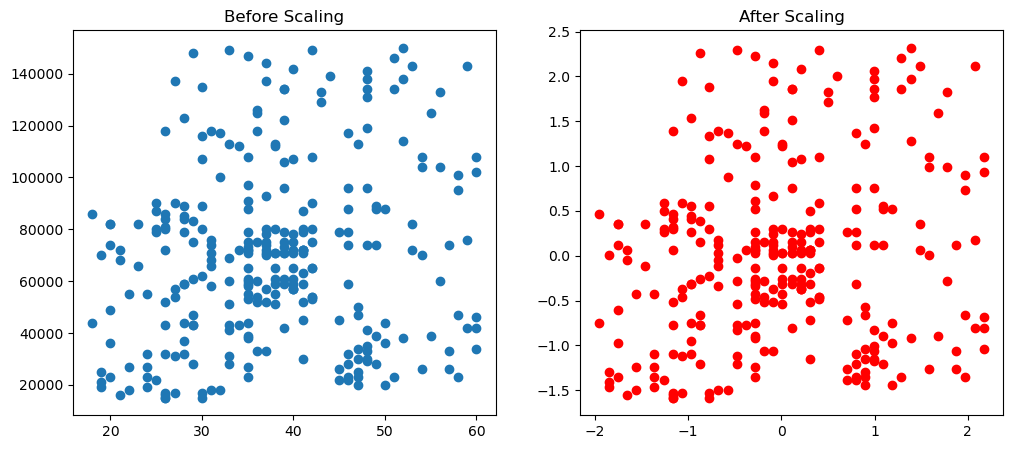

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

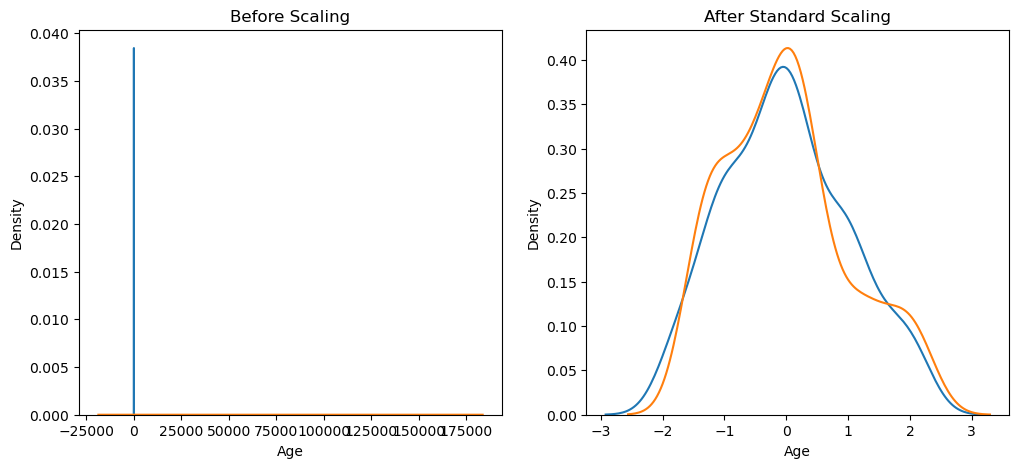

<Figure size 640x480 with 0 Axes>

In [17]:
 import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for 'Age'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create subplots for 'Age' before and after scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


# Plot KDE for 'Age' after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()
plt.tight_layout()

plt.show()


# Comparison of Distributions

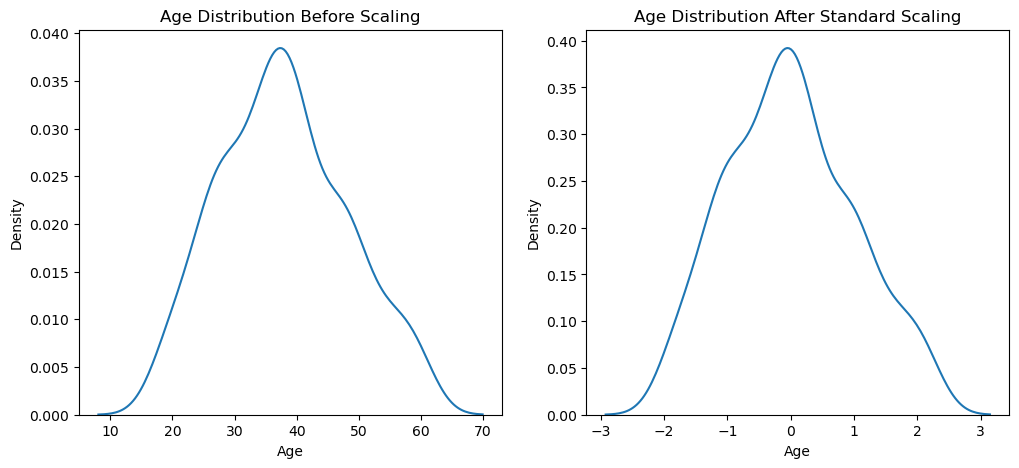

In [18]:
# Create subplots for 'Age' distribution before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot 'Age' distribution before scaling
ax1.set_title('Age Distribution Before Scaling')  # Set the title for the first subplot
sns.kdeplot(X_train['Age'], ax=ax1)  # Plot the KDE plot for 'Age' before scaling on the first subplot

# Plot 'Age' distribution after standard scaling
ax2.set_title('Age Distribution After Standard Scaling')  # Set the title for the second subplot
sns.kdeplot(X_train_scaled['Age'], ax=ax2)  # Plot the KDE plot for 'Age' after scaling on the second subplot

plt.show()

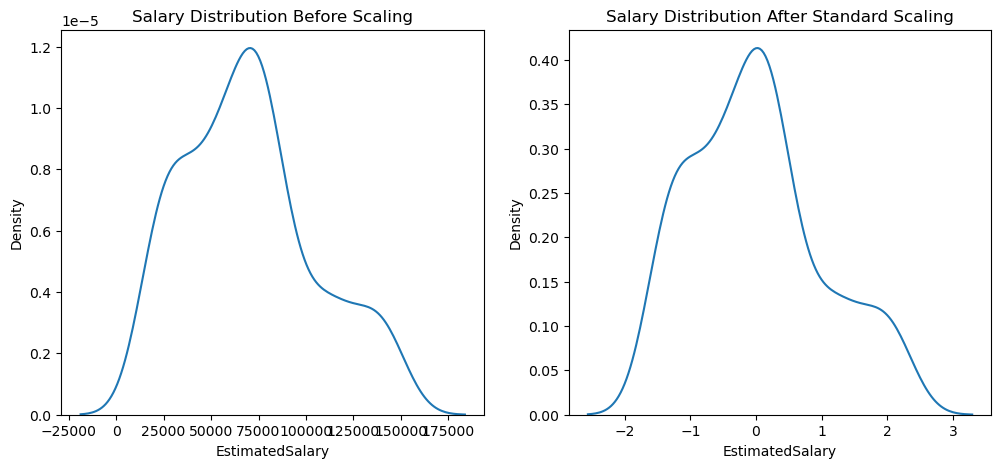

In [19]:
# Create subplots for 'EstimatedSalary' distribution before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot 'EstimatedSalary' distribution before scaling
ax1.set_title('Salary Distribution Before Scaling')  # Set the title for the first subplot
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)  # Plot the KDE plot for 'EstimatedSalary' before scaling on the first subplot

# Plot 'EstimatedSalary' distribution after standard scaling
ax2.set_title('Salary Distribution After Standard Scaling')  # Set the title for the second subplot
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)  # Plot the KDE plot for 'EstimatedSalary' after scaling on the second subplot

plt.show()


# scaling is important?

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [22]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [28]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [38]:
#Algorithms like decision tree classification,random forest,GB boost,XG boost etc have no effect of standardization

In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#Algorithms like k-means clustering,K-nearest-neighbours,Principal-component analysis,artificial neural network,gradient descent require standardization....